**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load Dataset**

In [2]:
df = pd.read_csv("/content/AB_NYC_2019.csv")

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Basic Exploration (Data Integrity Check)**

In [3]:
print("\nDATA INFO:")
print(df.info())

print("\nCOLUMN NAMES:")
print(df.columns)

print("\nMISSING VALUES:")
print(df.isnull().sum())

print("\nSTATISTICS:")
df.describe(include="all")



DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


**Handle Missing Data**

In [4]:
# Fill text missing values
df["name"] = df["name"].fillna("Unknown Listing")
df["host_name"] = df["host_name"].fillna("Unknown Host")

# Convert last_review to datetime
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")

# Fill missing reviews_per_month using zeros
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

print("\nMissing values after cleaning:")
df.isnull().sum()



Missing values after cleaning:


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


**Remove Duplicate Entries**

In [5]:
duplicate_count = df.duplicated().sum()
print("Duplicates Before:", duplicate_count)

df = df.drop_duplicates()

print("Duplicates After:", df.duplicated().sum())


Duplicates Before: 0
Duplicates After: 0


**Standardize Data Formats**

In [6]:
# Ensure price is numeric (should already be but we confirm)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Convert neighborhood names to title case
df["neighbourhood_group"] = df["neighbourhood_group"].str.title()
df["neighbourhood"] = df["neighbourhood"].str.title()

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Detect Outliers (Price, Minimum Nights)**

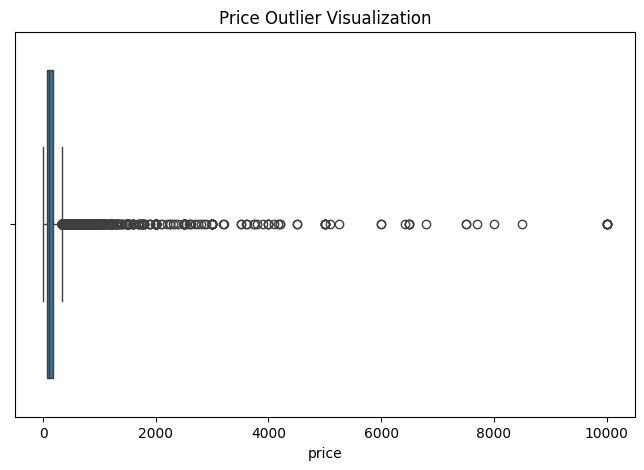

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["price"])
plt.title("Price Outlier Visualization")
plt.show()


**Statistical Outlier Removal (IQR Method)**

In [8]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Price Range Before:", df["price"].min(), "to", df["price"].max())

df = df[(df["price"] >= 0) & (df["price"] <= upper)]

print("Price Range After:", df["price"].min(), "to", df["price"].max())


Price Range Before: 0 to 10000
Price Range After: 0 to 334


**Validate Data Integrity After Cleaning**

In [9]:
print("\nFinal Data Shape:", df.shape)

print("\nFinal Missing Values:")
print(df.isnull().sum())

df.describe()



Final Data Shape: (45923, 16)

Final Missing Values:
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9012
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.592300e+04,4.592300e+04,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,36911,45923.000000,45923.000000,45923.000000
mean,1.889853e+07,6.632693e+07,40.728488,-73.950733,119.970320,6.938070,23.942665,2018-10-02 17:43:45.656308736,1.107739,6.639701,109.378699
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.436180e+06,7.724081e+06,40.689235,-73.981925,65.000000,1.000000,1.000000,2018-07-02 00:00:00,0.050000,1.000000,0.000000
50%,1.952568e+07,3.028359e+07,40.721770,-73.954370,100.000000,2.000000,5.000000,2019-05-19 00:00:00,0.380000,1.000000,39.000000
75%,2.891256e+07,1.055068e+08,40.763390,-73.934315,159.000000,5.000000,24.000000,2019-06-23 00:00:00,1.620000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.091922e+07,7.755778e+07,0.055331,0.046471,68.150148,19.857823,45.315219,NaN,1.612657,31.008148,130.279393
